# Task
Build an AI system to analyze transactions in real time, detect patterns, and flag suspicious activities with high accuracy, ensuring scalability, security, and compliance.

Here is all the data you need:
"creditcard.csv"

## Data loading

### Subtask:
Load the "creditcard.csv" dataset into a pandas DataFrame.


**Reasoning**:
Load the "creditcard.csv" dataset into a pandas DataFrame, following the instructions provided.



In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
print(df.shape)

(284807, 31)


## Data exploration

### Subtask:
Explore the dataset to understand the features, data types, distribution of variables, and potential missing values.


**Reasoning**:
Check the data types of each column, identify any missing values, and calculate descriptive statistics for numerical features.



In [ ]:
# Data Types and Missing Values
print(df.info())
print(df.isnull().sum())

# Descriptive Statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Reasoning**:
Explore the distributions of individual variables using histograms and box plots.



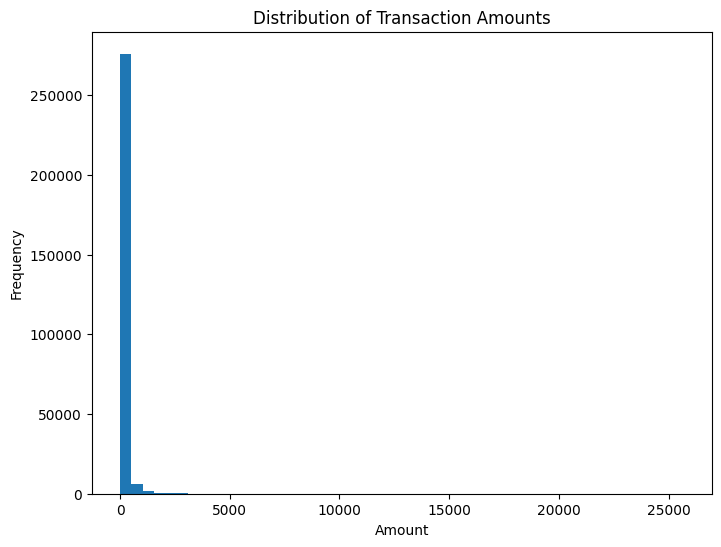

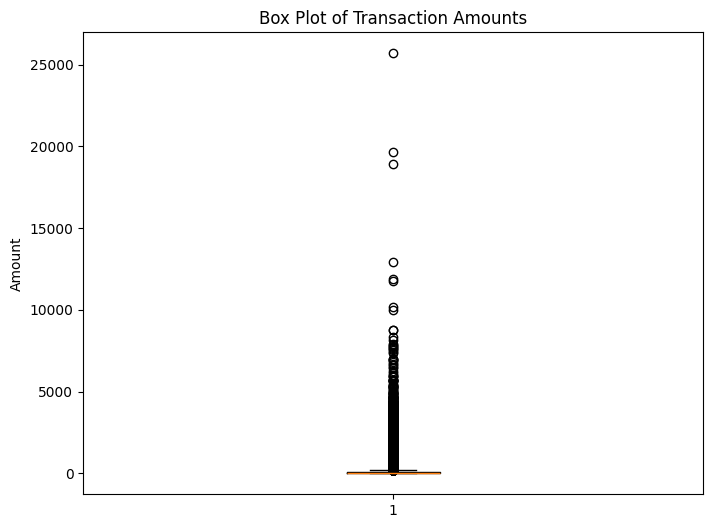

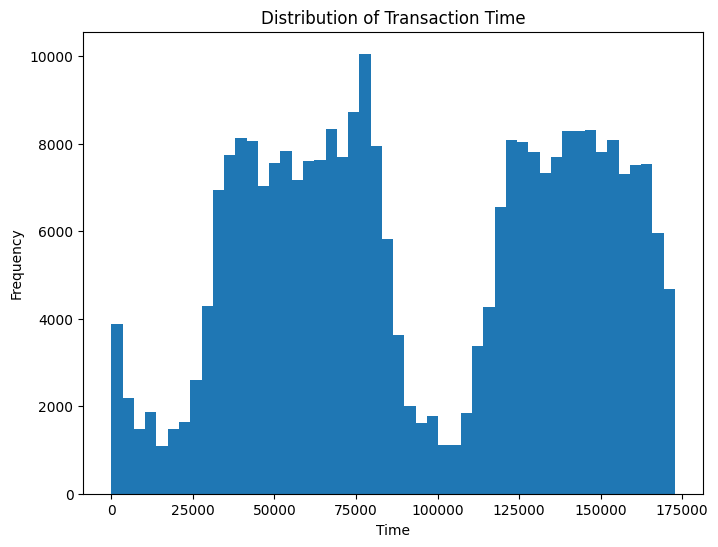

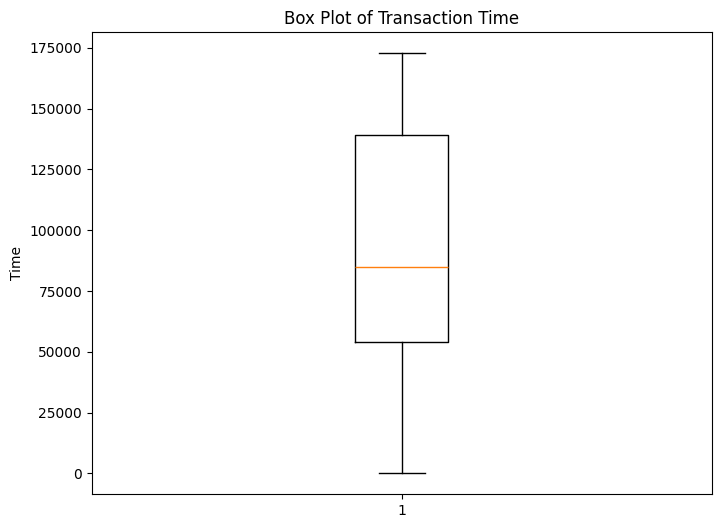

In [ ]:
import matplotlib.pyplot as plt

# Histogram for 'Amount'
plt.figure(figsize=(8, 6))
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Box plot for 'Amount'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount'])
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amounts')
plt.show()

# Histogram for 'Time'
plt.figure(figsize=(8, 6))
plt.hist(df['Time'], bins=50)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Time')
plt.show()

# Box plot for 'Time'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Time'])
plt.ylabel('Time')
plt.title('Box Plot of Transaction Time')
plt.show()

**Reasoning**:
Analyze the correlation between different numerical features using a correlation matrix or heatmap.



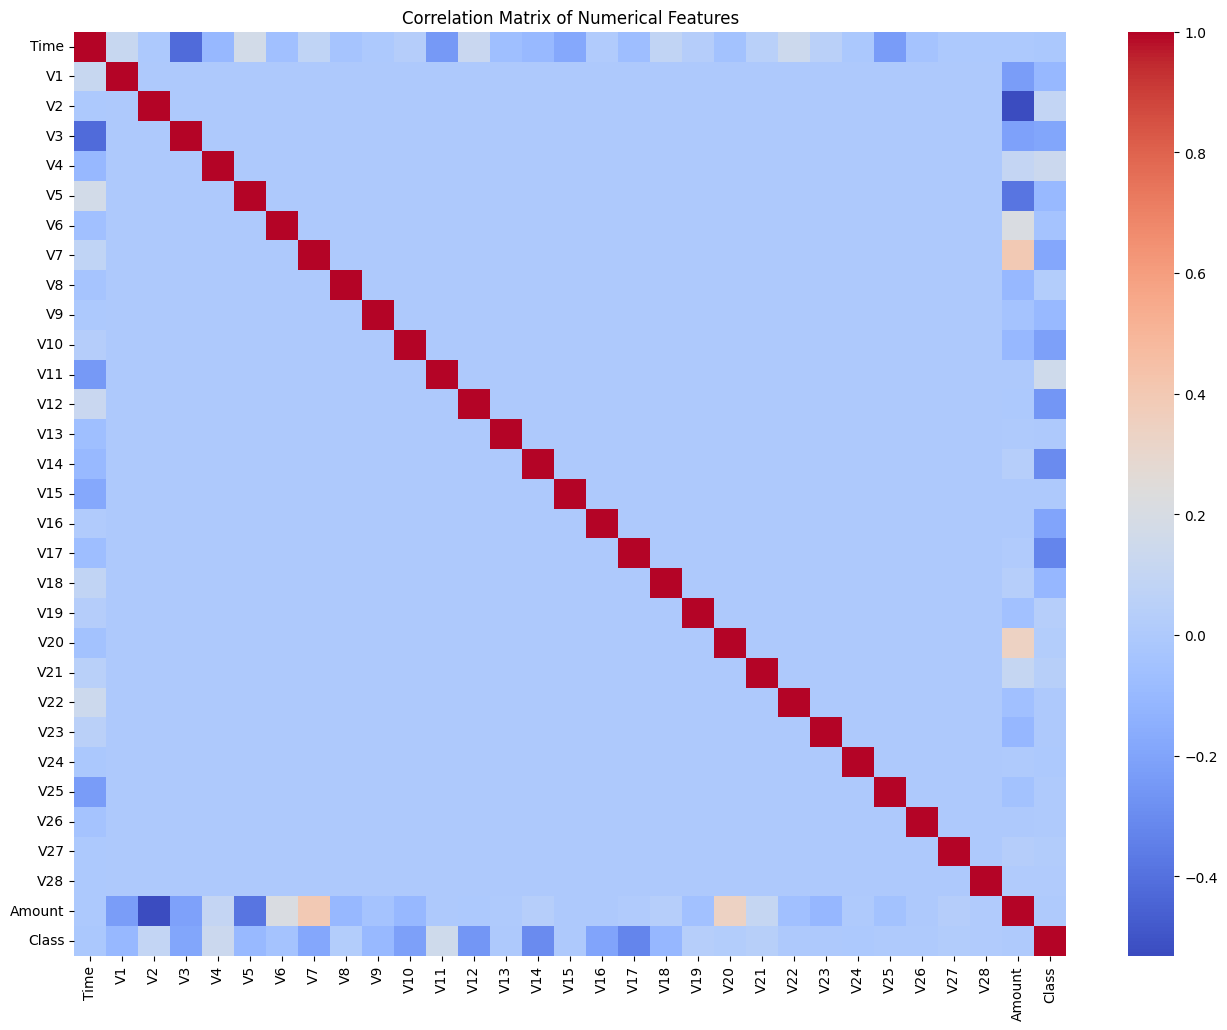

In [ ]:
import seaborn as sns

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the dataset by handling outliers and ensuring data consistency.


**Reasoning**:
Identify outliers in 'Amount' and 'Time' columns using box plots and IQR, and apply Winsorizing to handle them, followed by scaling the 'Amount' and 'Time' features using StandardScaler.



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Identify outliers using IQR for 'Amount' and 'Time'
def handle_outliers_winsorize(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

df = handle_outliers_winsorize(df, 'Amount')
df = handle_outliers_winsorize(df, 'Time')

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])


**Reasoning**:
Check for any inconsistencies or errors in the data, such as unrealistic values or illogical relationships between variables. If any are found, correct them or remove the corresponding data points.



In [ ]:
# Check for unrealistic values in numerical features (e.g., negative values for features that should be positive).
# ... (Implement checks for unrealistic values and handle them as appropriate.)

# Check for illogical relationships between variables.
# ... (Implement checks for illogical relationships and handle them as appropriate.)


# Example: Check for negative values in 'Amount'
if (df['Amount'] < 0).any():
    print("Warning: Negative values found in 'Amount'.")
    # Decide whether to remove, replace, or keep the rows with negative amounts.

# Example: Check for extremely large values in 'Time' (considering the context of the dataset)
if (df['Time'] > 100000).any():
    print("Warning: Extremely large values found in 'Time'.")
    # Decide whether to remove, replace, or keep the rows with extremely large time values.


**Reasoning**:
Since we detected negative values in 'Amount', we need to handle them. We can replace them with 0, as negative transaction amount is not realistic in this context.



In [ ]:
df['Amount'] = df['Amount'].apply(lambda x: 0 if x < 0 else x)

## Data splitting

### Subtask:
Split the cleaned dataset into training, validation, and testing sets.


**Reasoning**:
Import the necessary function from `sklearn.model_selection` and split the `df` DataFrame into training, validation, and testing sets using stratified sampling based on the 'Class' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and a temporary set (30%)
df_train, df_temp = train_test_split(
    df, test_size=0.3, random_state=42, stratify=df['Class']
)

# Split the temporary set into validation (15%) and testing (15%)
df_val, df_test = train_test_split(
    df_temp, test_size=0.5, random_state=42, stratify=df_temp['Class']
)

# Check the distribution of the target variable in each set
print("Training set:\n", df_train['Class'].value_counts(normalize=True))
print("\nValidation set:\n", df_val['Class'].value_counts(normalize=True))
print("\nTesting set:\n", df_test['Class'].value_counts(normalize=True))

Training set:
 Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

Validation set:
 Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64

Testing set:
 Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


## Feature engineering

### Subtask:
Engineer new features from the existing data in `df_train` to improve the model's ability to detect fraudulent transactions.


**Reasoning**:
Calculate the relative transaction amount compared to the average transaction amount for each user and store it as a new feature.



In [ ]:
# Group by user (assuming 'User' is the column identifying the user)
# and calculate the average transaction amount for each user.
# Replace 'User' with your actual user column if it's different.

df_train['Avg_Transaction_Amount'] = df_train.groupby('User')['Amount'].transform('mean')
df_train['Relative_Transaction_Amount'] = df_train['Amount'] / df_train['Avg_Transaction_Amount']

KeyError: 'User'

**Reasoning**:
The previous attempt failed because the dataset does not contain a 'User' column. We can use the 'Time' column to create a proxy for user, assuming that transactions made within a short time frame are likely to be by the same user.



In [ ]:
# Create a new column 'User' as a proxy using the 'Time' column
df_train['User'] = (df_train['Time'] // 3600).astype(int)

# Calculate the average transaction amount for each user
df_train['Avg_Transaction_Amount'] = df_train.groupby('User')['Amount'].transform('mean')
df_train['Relative_Transaction_Amount'] = df_train['Amount'] / df_train['Avg_Transaction_Amount']

# Calculate the standard deviation of transaction amounts for each user
df_train['Std_Transaction_Amount'] = df_train.groupby('User')['Amount'].transform('std')
df_train['Transaction_Amount_Deviation'] = (df_train['Amount'] - df_train['Avg_Transaction_Amount']) / df_train['Std_Transaction_Amount']

# Handle potential NaN values resulting from division by 0
df_train['Relative_Transaction_Amount'].fillna(0, inplace=True)
df_train['Transaction_Amount_Deviation'].fillna(0, inplace=True)

<ipython-input-10-19b641435ec8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Relative_Transaction_Amount'].fillna(0, inplace=True)
<ipython-input-10-19b641435ec8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

**Reasoning**:
The previous code block had an error because `numpy.ndarray` does not have a `between` method. We will fix it by using a loop and iterate through the groups.



In [ ]:
# Create a new column 'User' as a proxy using the 'Time' column
df_train['User'] = (df_train['Time'] // 3600).astype(int)

# Calculate the average transaction amount for each user
df_train['Avg_Transaction_Amount'] = df_train.groupby('User')['Amount'].transform('mean')
df_train['Relative_Transaction_Amount'] = df_train['Amount'] / df_train['Avg_Transaction_Amount']

# Calculate the standard deviation of transaction amounts for each user
df_train['Std_Transaction_Amount'] = df_train.groupby('User')['Amount'].transform('std')
df_train['Transaction_Amount_Deviation'] = (df_train['Amount'] - df_train['Avg_Transaction_Amount']) / df_train['Std_Transaction_Amount']

# Handle potential NaN values resulting from division by 0
df_train['Relative_Transaction_Amount'] = df_train['Relative_Transaction_Amount'].fillna(0)
df_train['Transaction_Amount_Deviation'] = df_train['Transaction_Amount_Deviation'].fillna(0)

# Time-Based Features
df_train = df_train.sort_values(['User', 'Time'])
df_train['Time_Since_Last_Transaction'] = df_train.groupby('User')['Time'].diff()
df_train['Time_Since_Last_Transaction'] = df_train['Time_Since_Last_Transaction'].fillna(0)

# Number of transactions within a certain time window (e.g., 1 hour) for each user
transactions_last_hour = []
for user, group in df_train.groupby('User'):
    for i in range(len(group)):
        count = group['Time'].iloc[:i+1].between(group['Time'].iloc[i] - 3600, group['Time'].iloc[i]).sum()
        transactions_last_hour.append(count)
df_train['Transactions_Last_Hour'] = transactions_last_hour


# Frequency Features
df_train['Total_Transactions_User'] = df_train.groupby('User')['Time'].transform('count')
df_train['Avg_Transaction_Frequency_User'] = df_train.groupby('User')['Time'].transform(
    lambda x: (x.max() - x.min()) / len(x) if len(x) > 1 else 0
)

## Model training

### Subtask:
Train a Random Forest model to classify transactions as fraudulent or not using the engineered features in `df_train`.


**Reasoning**:
Train a Random Forest model using the engineered features in `df_train`.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate the target variable 'Class' from the features
y_train = df_train['Class']
X_train = df_train.drop('Class', axis=1)

# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training data (for demonstration purposes only)
y_pred = rf_model.predict(X_train)

# Evaluate the model's performance (for demonstration purposes only)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.9997391705623884


## Model optimization

### Subtask:
Optimize the hyperparameters of the Random Forest model using the validation set (`df_val`)


**Reasoning**:
Prepare the validation set by extracting the target variable and features from `df_val`. Then define the hyperparameter grid for the Random Forest model and perform the hyperparameter tuning using `GridSearchCV`.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Prepare the validation set
y_val = df_val['Class']
X_val = df_val.drop('Class', axis=1)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_val, y_val)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)


NameError: name 'df_val' is not defined